In [1]:
# ---------------------------------------------------------
# 
# THREE PANELS PLOT -- d18 anom v distance
# 
# ---------------------------------------------------------
import os
import numpy as np
import xarray as xr
import math
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.integrate
from scipy.interpolate import griddata  # for re-gridding np arrays in tau-bar fxn
from matplotlib import gridspec
import cartopy
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from scipy.spatial import distance  # for finding closest coord in df
# for colors
import cmocean
import cmocean.cm as cmo
import seaborn as sns # used for discrete

In [11]:
# --- save the plots?
figsave_on = False
# ---
saveHere = ""    # where to save panels

In [3]:
# read in panel 1 [RTM]
mainpath = ""
p1_path = os.path.join(mainpath, "data_and_analysis/anom_v_distance/rtmdat")
p1_fn = "rtm_df.csv"

dfrtm = pd.read_csv(os.path.join(p1_path, p1_fn))
dfrtm_p = dfrtm.loc[dfrtm['site_region']=="inland"]
dfrtm_p

,Unnamed: 0.1,Unnamed: 0,upwind_dist_km,site_Dd18O,site_DW,dist_inland_km,site_region
2,2,3,0.000000,0.145351,0.508063,3000,inland
5,5,6,78.555935,-0.179546,-0.699394,3000,inland
8,8,9,157.909407,-0.490619,-1.793098,3000,inland
11,11,12,238.076774,-0.788585,-2.787095,3000,inland
14,14,15,319.074906,-1.074166,-3.693241,3000,inland
...,...,...,...,...,...,...,...
287,287,288,24533.903657,-0.325844,-16.369177,3000,inland
290,290,291,26584.608281,-0.308169,-16.369223,3000,inland
293,293,294,29372.468732,-0.294911,-16.369242,3000,inland
296,296,297,33746.565511,-0.286614,-16.369247,3000,inland


In [4]:
# read in panel 2 [paleo]
p2_path = os.path.join(mainpath, "data_and_analysis/anom_v_distance/paleodat")
p2_fndist = "paleo_dist.npy"
p2_fnd18 = "paleo_Dtau.npy"
p2_fnDd18 = "paleo_Dslope.npy"
# read in 
pal_dist = np.load(os.path.join(p2_path, p2_fndist))
pal_Dd18 = np.load(os.path.join(p2_path, p2_fnDd18))
pal_d18 = np.load(os.path.join(p2_path, p2_fnd18))
pal_d18

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-2.99202033, -3.02511725,         nan, ...,         nan,
                nan,         nan],
       [-0.69660934, -1.91758475, -1.32281506, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [5]:
# read in panel 3 [icesm]
p3_path = os.path.join(mainpath, "data_and_analysis/anom_v_distance/icesmdat")
p3_fnd18 = "d18_anom_ae.npy"
p3_fndist = "d18Cross_ae.npy"
p3_fnDd18 = "Dd18_anom_ae.npy"
# read in 
icesm_dist = np.load(os.path.join(p3_path, p3_fndist))
icesm_d18 = np.load(os.path.join(p3_path, p3_fnd18))
icesm_Dd18 = np.load(os.path.join(p3_path, p3_fnDd18))
icesm_d18

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [3.0085416, 2.9331818, 2.9557252, ...,       nan, 3.4704266,
        3.336771 ],
       [3.414731 , 3.089583 , 2.9724832, ...,       nan,       nan,
              nan],
       [      nan,       nan, 3.1418028, ...,       nan,       nan,
              nan]], dtype=float32)

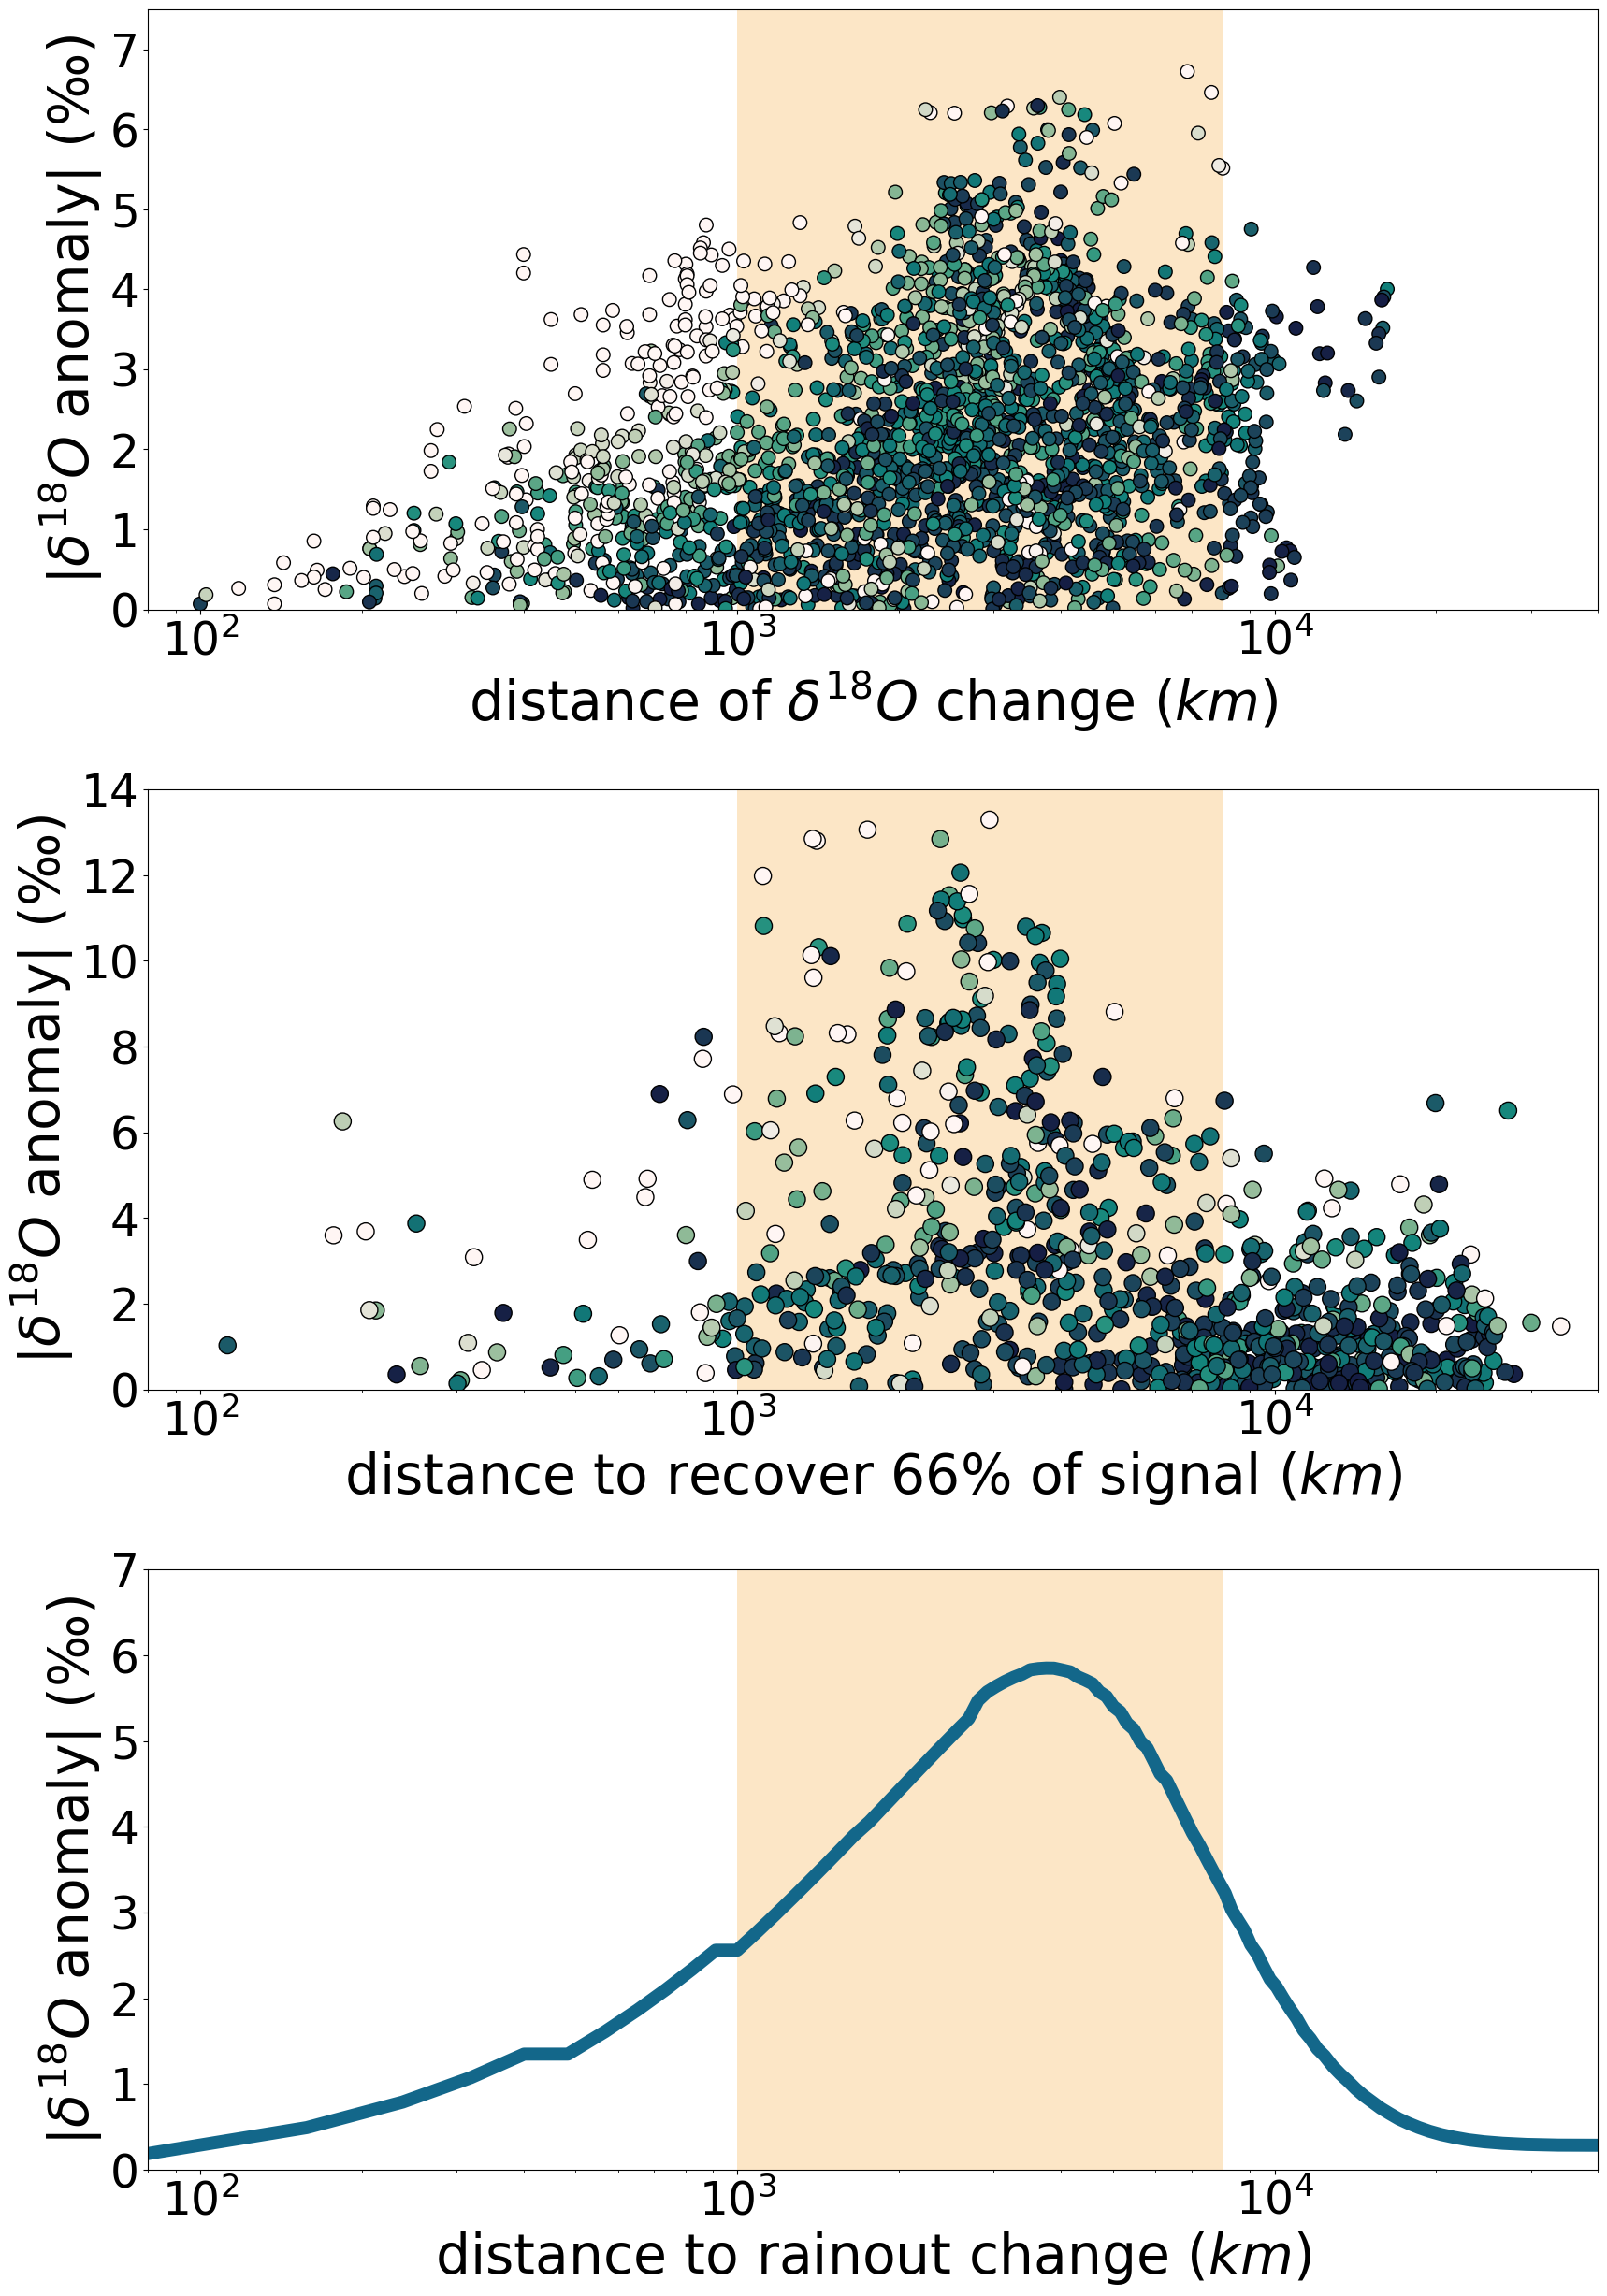

In [12]:
# ---- PLOT --------------------------------------------------
# ---- 
# ---- POINTS COLORED BY SLOPE ANOMALY
# ----
# 
fname = "d18anom_v_dist_panels_ptsColor.png"
# ... set ax limits
xmin, xmax = 0.8e2, 4e4
# ax label size
ylabsize, xlabsize = 42, 42
xticksize, yticksize = 35, 35

# pt properties
colmap = cmo.tempo_r
ptsize1, ptsize2 = 110, 170  # iCESM pts, Paleo pts
ptcol = "red"
edgecol = "black"

# add bounding box lims
plot_bb = True
minx, maxx = 1e3, 8e3
ymin, ymax = -0.5, 15


# ... PLOT [case minus ctrl]
spec = gridspec.GridSpec(ncols=1, nrows=3, hspace=0.3)
plt.figure(figsize=(20,30))


# TOP -- iCESM
ax = plt.subplot(spec[0])
plt.scatter(icesm_dist, np.abs(icesm_d18), edgecolors=edgecol, 
            c=np.abs(icesm_Dd18), cmap=colmap, s=ptsize1, vmin=0, vmax=3)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 7.5)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance of $\delta^{18}O$ change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# MIDDLE -- PALEO
ax = plt.subplot(spec[1])
plt.scatter(pal_dist, np.abs(pal_d18), edgecolors=edgecol, 
            c=np.abs(pal_Dd18), cmap=colmap, s=ptsize2, vmin=0, vmax=3)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 14)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to recover 66% of signal $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# BOTTOM -- RTM
ax = plt.subplot(spec[2])
plt.plot(dfrtm_p['upwind_dist_km'], np.abs(dfrtm_p['site_Dd18O']), linewidth=10, c='#13678A')
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 7)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to rainout change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# --- 
if figsave_on:
    plt.savefig(os.path.join(saveHere, fname), dpi=300, bbox_inches='tight', transparent=True)
# plt.show();
# plt.close();

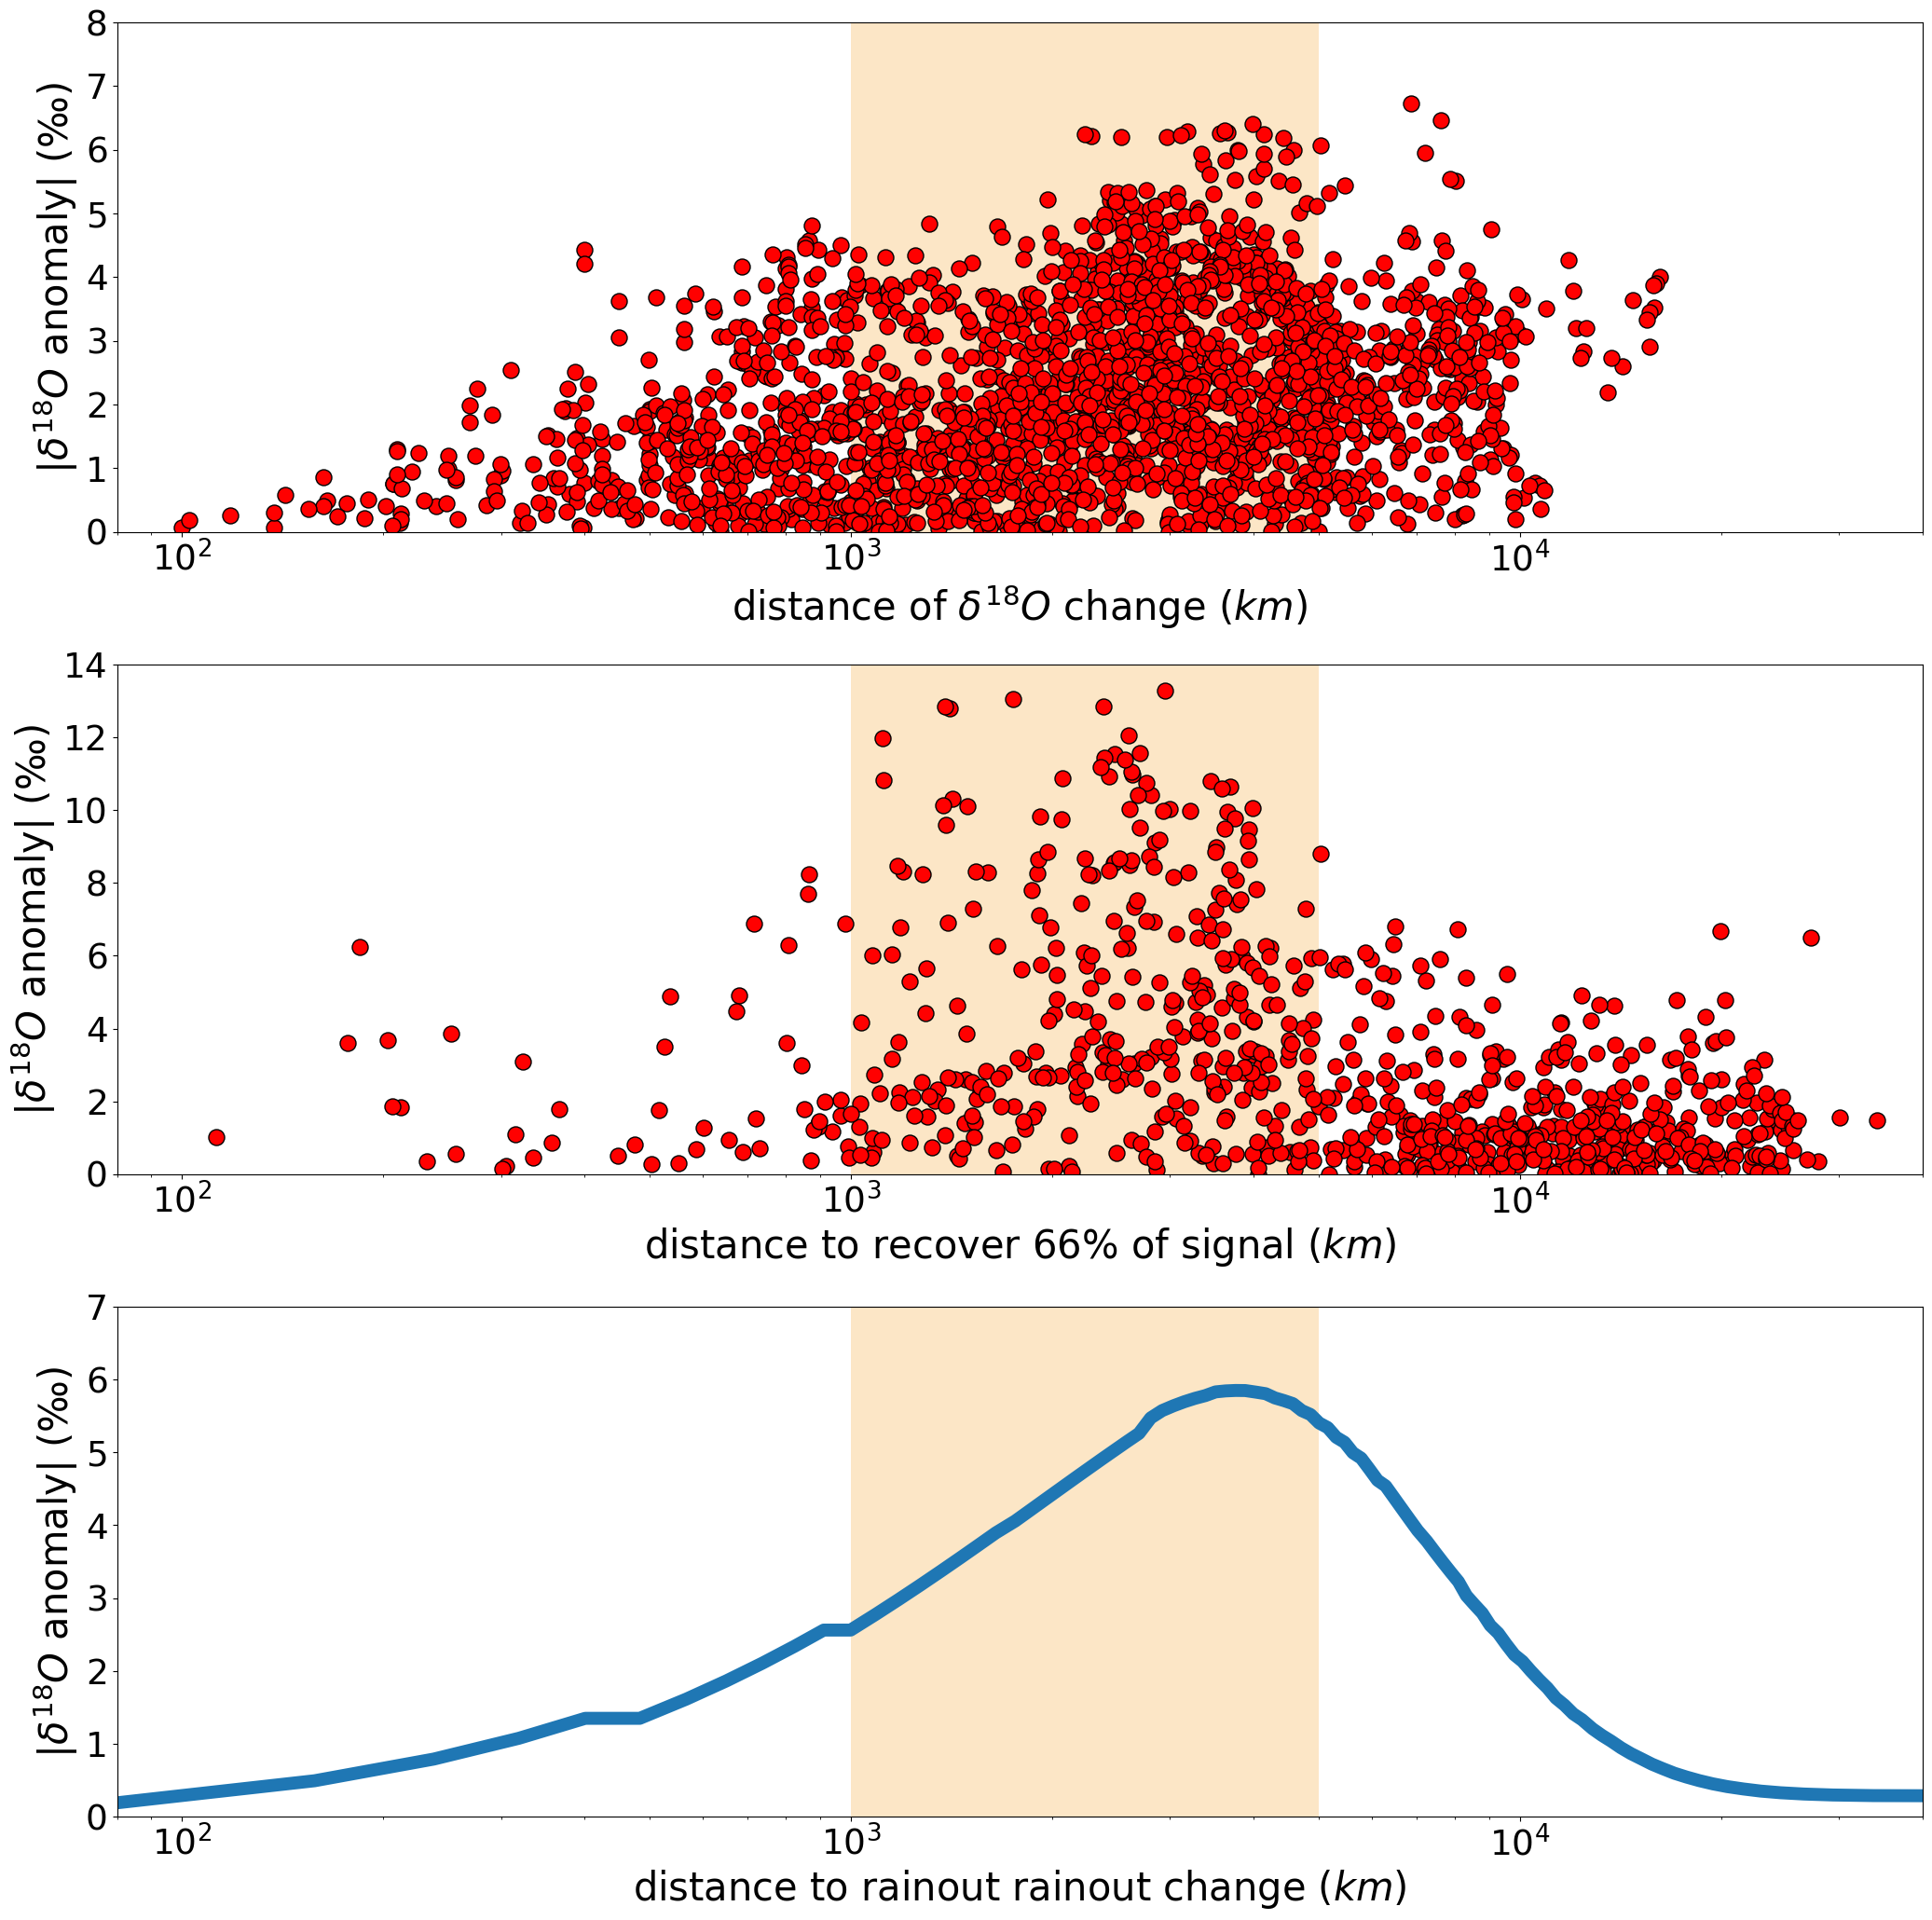

In [7]:
# ---- PLOT --------------------------------------------------
# ---- 
# ---- POINTS ARE NOT COLORED 
# ----
# 
fname = "d18anom_v_dist_panels_noColor.png"
# ... set ax limits
xmin, xmax = 0.8e2, 4e4
# ax label size
ylabsize, xlabsize = 30, 30
xticksize, yticksize = 27, 27

# pt properties
ptsize = 150
ptcol = "red"
edgecol = "black"

# add bounding box lims
plot_bb = True
minx, maxx = 1e3, 8e3
ymin, ymax = -0.5, 15


# ... PLOT [case minus ctrl]
spec = gridspec.GridSpec(ncols=1, nrows=3, hspace=0.26)
plt.figure(figsize=(25,25))

# TOP -- iCESM
ax = plt.subplot(spec[0])
plt.scatter(icesm_dist, np.abs(icesm_d18), edgecolors=edgecol, c=ptcol, s=ptsize)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 8)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance of $\delta^{18}O$ change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# MIDDLE -- PALEO
ax = plt.subplot(spec[1])
plt.scatter(pal_dist, np.abs(pal_d18), edgecolors=edgecol, c=ptcol, s=ptsize)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 14)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to recover 66% of signal $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# BOTTOM -- RTM
ax = plt.subplot(spec[2])
plt.plot(dfrtm_p['upwind_dist_km'], np.abs(dfrtm_p['site_Dd18O']), linewidth=10)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 7)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to rainout rainout change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# --- 
if figsave_on:
    plt.savefig(os.path.join(saveHere, fname), dpi=300, bbox_inches='tight', transparent=True)
# plt.show();
# plt.close();

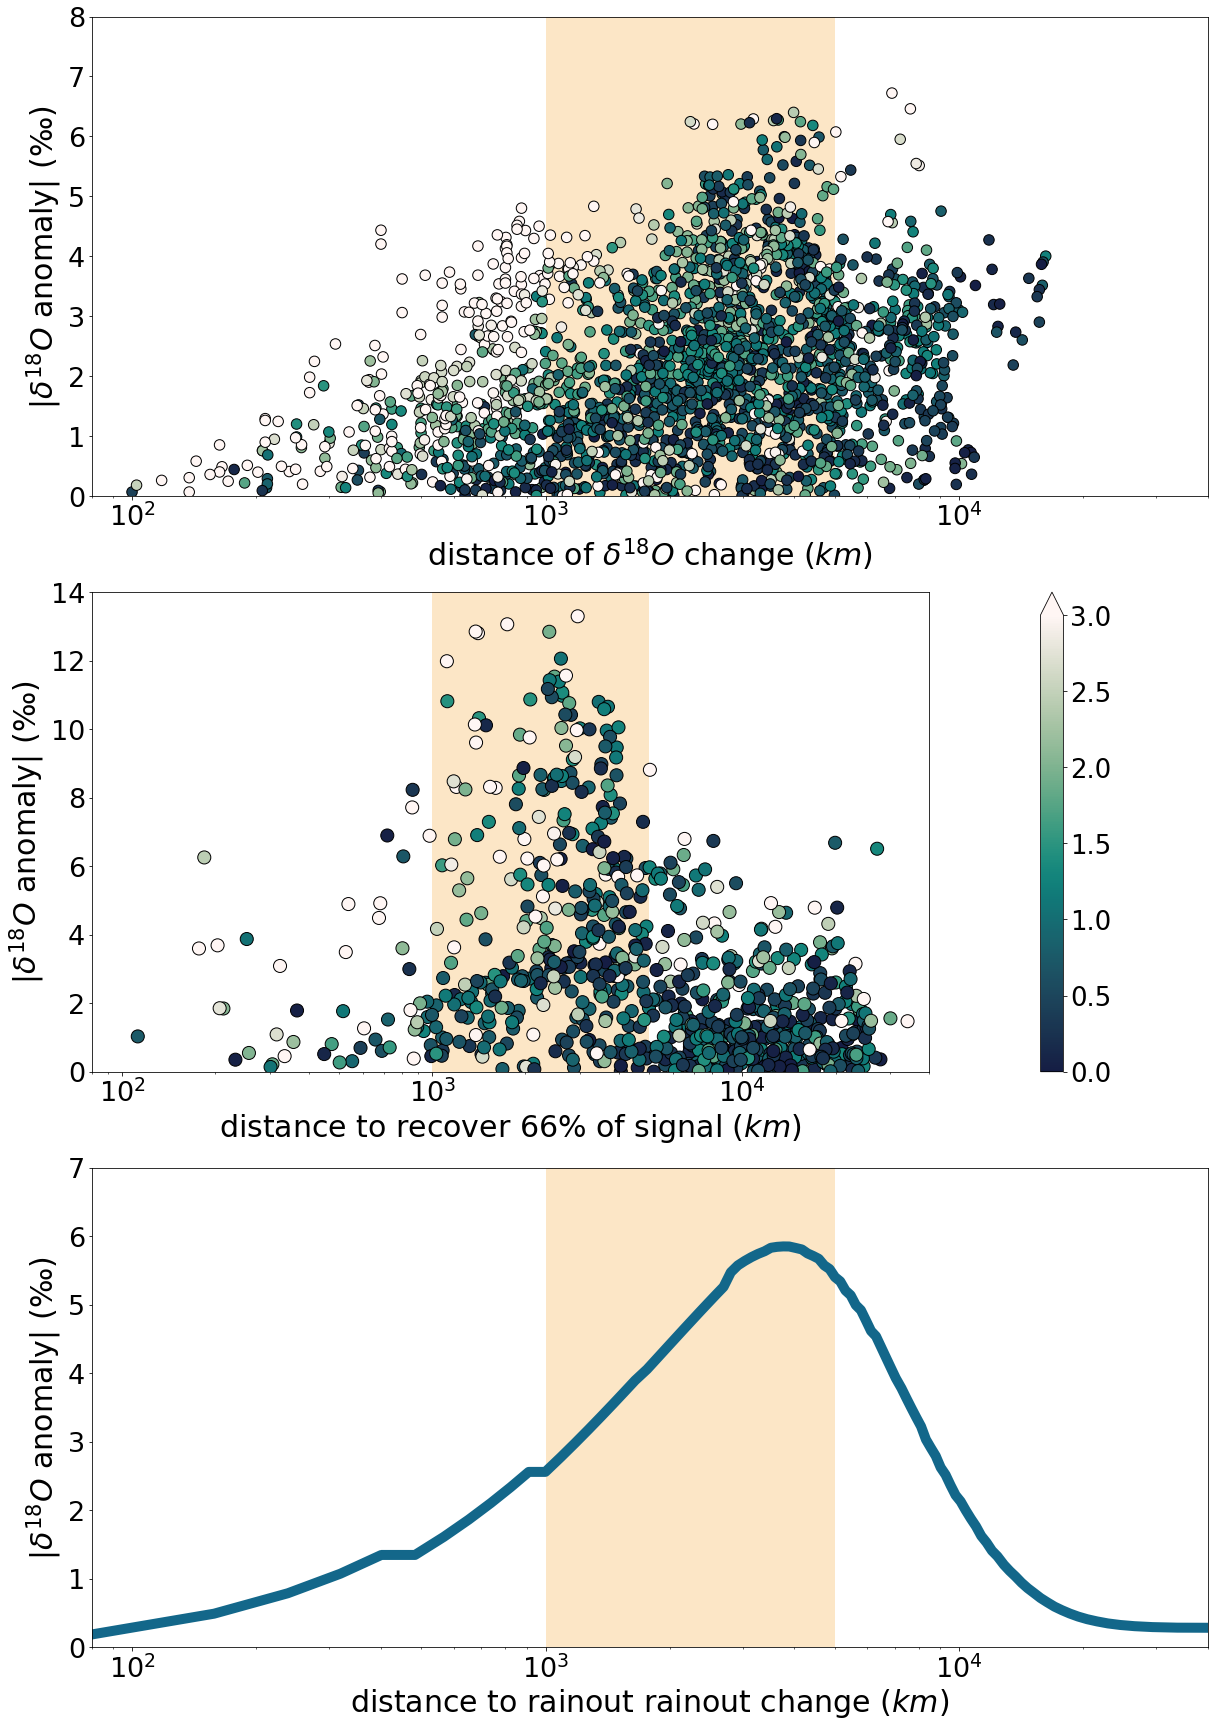

In [35]:
# ---- PLOT --------------------------------------------------
# ---- 
# ---- POINTS COLORED BY SLOPE ANOMALY -- WITH COLORBAR
# ----
# 
fname = "d18anom_v_dist_panels_ptsColored_ColorBar.png"
# ... set ax limits
xmin, xmax = 0.8e2, 4e4
# ax label size
ylabsize, xlabsize = 30, 30
xticksize, yticksize = 27, 27

# pt properties
colmap = cmo.tempo_r
ptsize1, ptsize2 = 110, 170  # iCESM pts, Paleo pts
ptcol = "red"
edgecol = "black"

# add bounding box lims
plot_bb = True
minx, maxx = 1e3, 8e3
ymin, ymax = -0.5, 15


# ... PLOT [case minus ctrl]
spec = gridspec.GridSpec(ncols=1, nrows=3, hspace=0.2)
plt.figure(figsize=(20,30))


# TOP -- iCESM
ax = plt.subplot(spec[0])
plt.scatter(icesm_dist, np.abs(icesm_d18), edgecolors=edgecol, 
            c=np.abs(icesm_Dd18), cmap=colmap, s=ptsize1, vmin=0, vmax=3)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 8)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance of $\delta^{18}O$ change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# MIDDLE -- PALEO
ax = plt.subplot(spec[1])
scatter = plt.scatter(pal_dist, np.abs(pal_d18), edgecolors=edgecol, 
                      c=np.abs(pal_Dd18), cmap=colmap, s=ptsize2, vmin=0, vmax=3)
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
# colorbar
colorbar = plt.colorbar(scatter, orientation='vertical', pad=0.1, shrink=1., extend='max')  # 'min', 'max', 'both', or 'neither'
colorbar.ax.tick_params(axis='y', labelsize=26)  # Adjust labelsize as needed
# colorbar.arrow_cap_style = 'projecting'  # Options: 'butt', 'round', 'projecting'
plt.xscale('log')
plt.ylim(0, 14)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to recover 66% of signal $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# BOTTOM -- RTM
ax = plt.subplot(spec[2])
plt.plot(dfrtm_p['upwind_dist_km'], np.abs(dfrtm_p['site_Dd18O']), linewidth=10, c='#13678A')
# draw bounding box
if plot_bb:
    plt.gca().add_patch(plt.Rectangle((minx, ymin), maxx - minx, ymax - ymin,
                                      linewidth=5, edgecolor='none', facecolor='#FBCF8E', 
                                      alpha=0.5,  zorder=0))
plt.xscale('log')
plt.ylim(0, 7)
plt.xlim(xmin, xmax)
plt.ylabel(r'$|\delta^{18}O$ anomaly| $\left(‰\right)$', fontsize=ylabsize)
plt.yticks(fontsize=yticksize)
plt.xlabel(r'distance to rainout rainout change $\left(km\right)$', fontsize=xlabsize)
plt.xticks(fontsize=xticksize)


# --- 
if figsave_on:
    plt.savefig(os.path.join(saveHere, fname), dpi=300, bbox_inches='tight', transparent=True)
# plt.show();
# plt.close();